In [2]:
from forcastlib.datasets.eeg import eeg_data

import numpy as np


In [3]:
# obtain data
data = eeg_data()


[raw data shape] (14980, 15)


In [5]:
# preporcess data
T_forecast = 349
T, obs_dim = data.shape
T_train = T - T_forecast

# standardize data
data_mean = data[0:T_train, :].mean(0)
data -= data_mean
data_std = data[0:T_train, :].std(0)
data /= data_std


In [6]:
from forcastlib.models.gaussproc import GaussianProcess

model = GaussianProcess()
model.fit(data, T_train)
pred_mean, pred_std = model.predict()


step 000  loss: 15.946
step 010  loss: 15.526
step 020  loss: 15.454
step 030  loss: 15.437
step 040  loss: 15.331
step 050  loss: 15.208
step 060  loss: 15.142
step 070  loss: 15.102
step 080  loss: 15.056
step 090  loss: 15.021
step 100  loss: 15.001
step 110  loss: 14.981
step 120  loss: 14.957
step 130  loss: 14.931
step 140  loss: 14.910
step 150  loss: 14.896
step 160  loss: 14.886
step 170  loss: 14.875
step 180  loss: 14.864
step 190  loss: 14.856
step 200  loss: 14.851
step 210  loss: 14.848
step 220  loss: 14.845
step 230  loss: 14.841
step 240  loss: 14.836
step 250  loss: 14.831
step 260  loss: 14.826
step 270  loss: 14.821
step 280  loss: 14.817
step 290  loss: 14.812


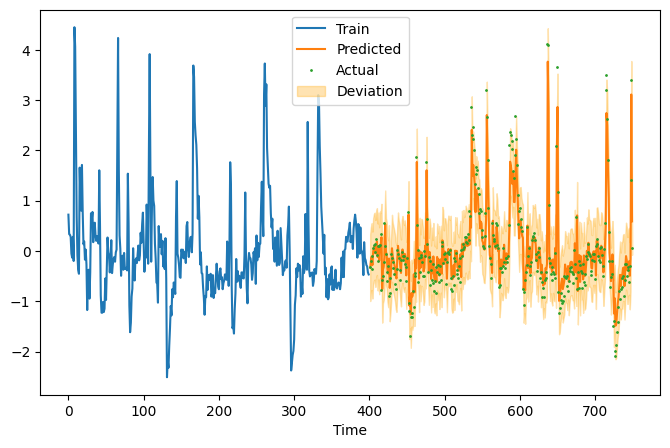

In [7]:
from forcastlib.graph.graph import plot_graph
plot_graph(data[:T_train, 0], data[T_train:, 0], pred_mean[:,0], -pred_std[:,0], pred_std[:,0] )